In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset (you can use a real-world dataset like the Pima Indians Diabetes Dataset)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
           'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

In [ ]:
# Splitting features (X) and labels (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Apply StandardScaler for normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Build the neural network model for diabetes prediction
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Using sigmoid for binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Compile the model with accuracy metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.6055 - loss: 0.6670 - val_accuracy: 0.7208 - val_loss: 0.5743
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6913 - loss: 0.5657 - val_accuracy: 0.7468 - val_loss: 0.5215
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7647 - loss: 0.5018 - val_accuracy: 0.7338 - val_loss: 0.5087
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7750 - loss: 0.4678 - val_accuracy: 0.7532 - val_loss: 0.5193
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7784 - loss: 0.4614 - val_accuracy: 0.7532 - val_loss: 0.5242
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7738 - loss: 0.4542 - val_accuracy: 0.7403 - val_loss: 0.5249
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7800 - loss: 0.4440 - val_accuracy: 0.7403 - val_loss: 0.5265
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7987 - loss: 0.4370 - val_accuracy: 0.7532 - v

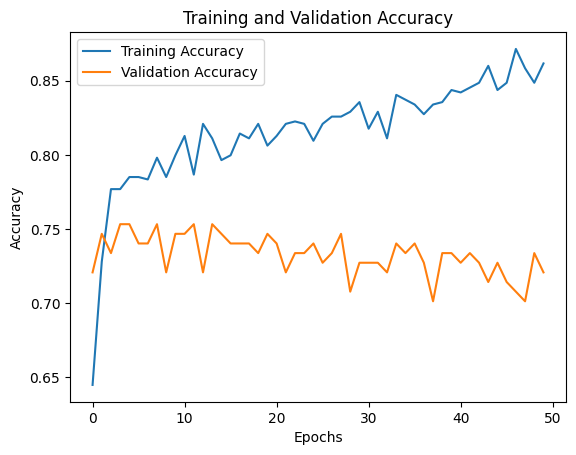

In [11]:
# Visualizing the training process
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

# Make predictions
predictions = (model.predict(X_test_scaled) > 0.5).astype("int32")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.6300 
Test Accuracy: 0.7207792401313782
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
